### Uber data Analysis

### Author- Rhythm Kaushik 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data Science\Data Sheet/Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.shape

(6745, 6)

In [4]:
# cheaking dublicate in Request ID
len(df["Request id"].unique())

6745

In [5]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
# percentage of Null Value
(df.isnull().sum()/df.shape[0])*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df["Request timestamp"].value_counts()

11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
11/7/2016 19:02        6
12/7/2016 19:31        5
                      ..
15-07-2016 07:59:34    1
11/7/2016 8:25         1
15-07-2016 19:54:55    1
13-07-2016 13:25:02    1
15-07-2016 16:47:39    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [11]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [12]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [14]:
df["Drop timestamp"]= pd.to_datetime(df["Drop timestamp"],dayfirst=True)
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
Req_hour= df["Request timestamp"].dt.hour

In [17]:
len(Req_hour)

6745

In [18]:
df["Req_hour"]= Req_hour

In [19]:
Req_day= df["Request timestamp"].dt.day

In [20]:
df["Req_day"]=Req_day

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


## Data Visualisation

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

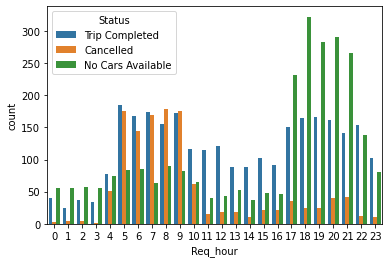

In [23]:
sns.countplot(x="Req_hour",data=df,hue="Status")
plt.show()

In [24]:
import warnings as wgs
wgs.filterwarnings("ignore")

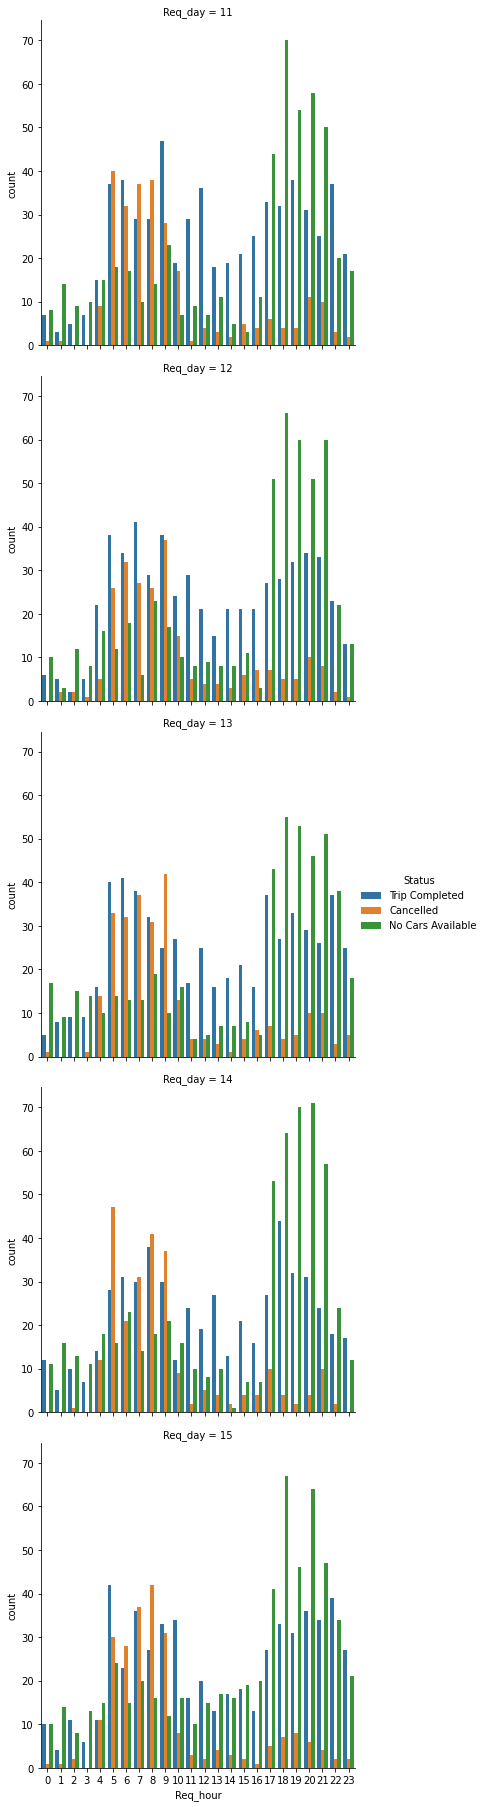

In [25]:
sns.factorplot(x="Req_hour",row="Req_day",data=df,kind="count",hue= "Status")
plt.show()

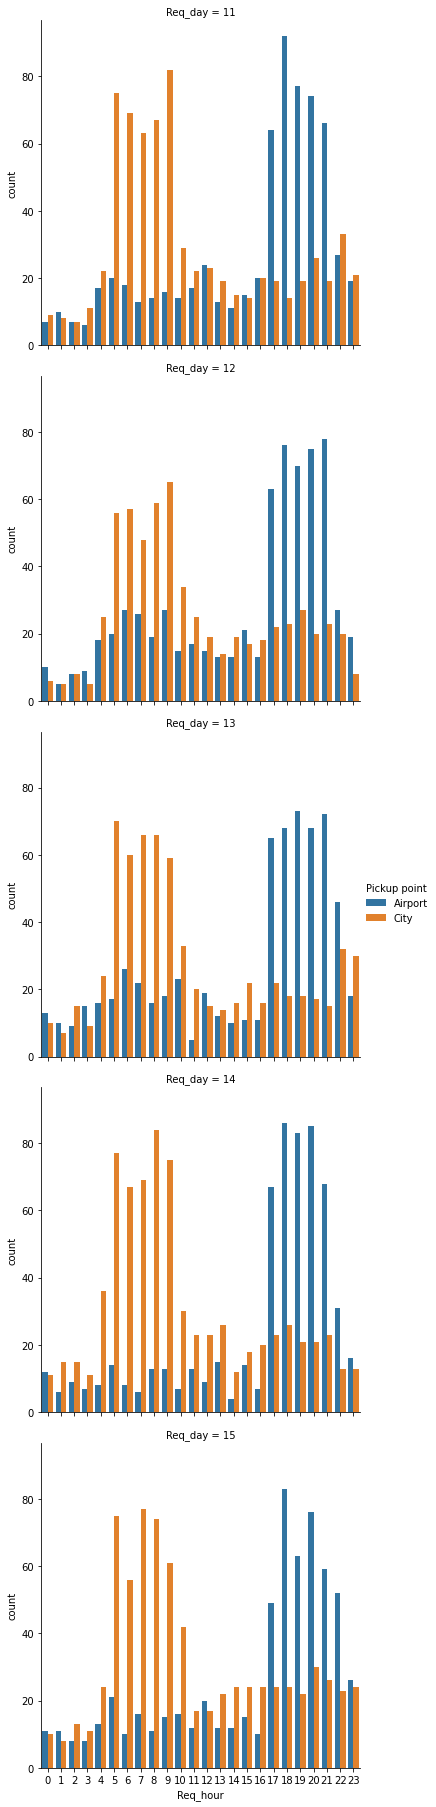

In [26]:
sns.factorplot(x="Req_hour",row="Req_day",data=df,kind="count",hue= "Pickup point")
plt.show()

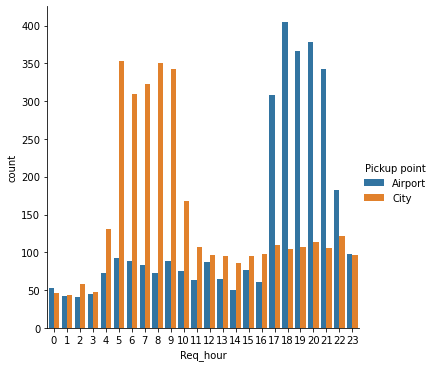

In [27]:
sns.factorplot(x="Req_hour",data=df,kind="count",hue= "Pickup point")
plt.show()

In [28]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [29]:
df["Time_Slot"]=0

In [30]:
j=0
for i in df["Req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
        
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
        
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1
        

In [31]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [32]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

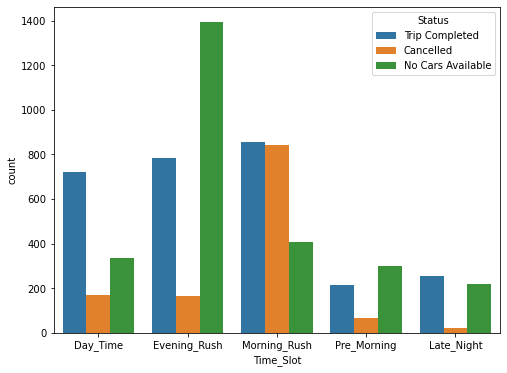

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [37]:
df_morning_rush = df[df["Time_Slot"]=="Morning_Rush"]
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

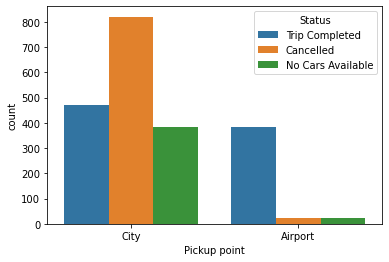

In [38]:
sns.countplot(x='Pickup point',hue='Status', data= df_morning_rush)

# Serverity of problem by location and their count(cancellation of cab as per pickup location at morning rush hours)

In [42]:
df_airport_cancelled= df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [50]:
df_airport_cancelled.shape

(23, 9)

In [47]:
df_city_cancelled= df_morning_rush.loc[(df_morning_rush["Pickup point"]== "City") & (df_morning_rush["Status"]=="Cancelled")]

In [93]:
df_city_cancelled.shape[0]

60

## Supply and Demand for Morning Rush

In [58]:
df_pickup_city=df_morning_rush.loc[df_morning_rush["Pickup point"]== "City"]
df_pickup_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [110]:
df_morning_rush["Status"].value_counts()

Trip Completed       854
Cancelled            843
No Cars Available    406
Name: Status, dtype: int64

### Morning Rush at City

In [104]:
df_morning_rush.loc[df_morning_rush["Pickup point"]== "City"].shape[0]

1677

In [107]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "City") & (df_morning_rush["Status"]== "Trip Completed")].shape[0]

472

In [108]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "City") & (df_morning_rush["Status"]== "Cancelled")].shape[0]

820

In [109]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "City") & (df_morning_rush["Status"]== "No Cars Available")].shape[0]

385

### Morning Rush at Airport

In [70]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport")].shape[0]

426

In [71]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport") & (df_morning_rush["Status"]== "Trip Completed")].shape[0]

382

In [101]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport") & (df_morning_rush["Status"]== "Cancelled")].shape[0]

23

In [102]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport") & (df_morning_rush["Status"]== "No Cars Available")].shape[0]

21

## Supply and Demand for Evening Rush

In [72]:
df_evening_rush = df[df["Time_Slot"]=="Evening_Rush"]
df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_hour,Req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

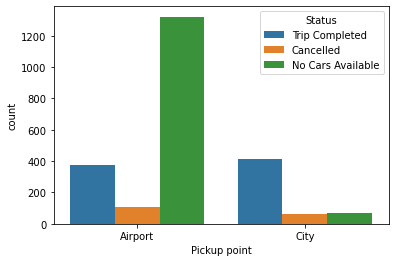

In [89]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [94]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

### Evening Rush at City

In [85]:
df_evening_rush.loc[df_evening_rush["Pickup point"]== "City"].shape[0]

542

In [86]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "City") & (df_evening_rush["Status"]== "Trip Completed")].shape[0]

411

In [96]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "City") & (df_evening_rush["Status"]== "No Cars Available")].shape[0]

71

In [97]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "City") & (df_evening_rush["Status"]== "Cancelled")].shape[0]

60

### Evening Rush at Airport

In [87]:
df_evening_rush.loc[df_evening_rush["Pickup point"]== "Airport"].shape[0]

1800

In [88]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "Airport") & (df_evening_rush["Status"]== "Trip Completed")].shape[0]

373

In [100]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "Airport") & (df_evening_rush["Status"]== "No Cars Available")].shape[0]

1321

In [99]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "Airport") & (df_evening_rush["Status"]== "Cancelled")].shape[0]

106

# Serverity problem at each location by looking cancellation of cabs in each of the pickup location

In [90]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "City") & (df_evening_rush["Status"]== "Cancelled")].shape[0]

60

In [91]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]== "Airport") & (df_evening_rush["Status"]== "Cancelled")].shape[0]

106

# Serverity problem by location in morning rush

In [112]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "City") & (df_morning_rush["Status"]== "Cancelled")].shape[0]

820

In [113]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]== "Airport") & (df_morning_rush["Status"]== "Cancelled")].shape[0]

23

# Pie Chart

In [134]:
df_morning_city = df.loc[(df["Pickup point"]=="City") & (df["Time_Slot"]=="Morning_Rush")]

In [135]:
df_morning_city_count =pd.DataFrame(df_morning_city["Status"].value_counts())

In [136]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [138]:
df_morning_city["Status"].values

array(['Trip Completed', 'Trip Completed', 'Trip Completed', ...,
       'No Cars Available', 'No Cars Available', 'No Cars Available'],
      dtype=object)

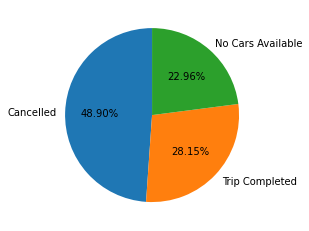

In [139]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels= df_morning_city_count["Status"].index,autopct='%.2f%%',startangle=90)
plt.show()

In [157]:
df_evening_airport = df.loc[(df["Pickup point"]=="Airport") & (df["Time_Slot"]=="Evening_Rush")]

In [158]:
df_evening_airport_count =pd.DataFrame(df_evening_airport["Status"].value_counts())

In [159]:
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [161]:
df_evening_airport_count["Status"].values

array([1321,  373,  106], dtype=int64)

In [162]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

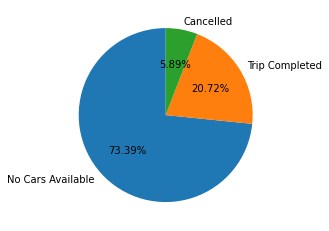

In [163]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels= df_evening_airport_count["Status"].index,autopct='%.2f%%',startangle=90)
plt.show()

### Recommendation
1. They Could be given a bonus for each trip they complete from the city to the airport in the morning rush.This will ensure that will ensure that less number of trips are cancelled.
2. Uber can pay for gas mileage of driver s to come back to the city without a ride
3. Drivers can again be given bonus to complete a trip from airport in the evening.
4. Uber can also pay drivers to come without panssenger to the airport.
5. Another way could be to increase of car pulling taxis so that lesser number of cars can serve more passengers